# Cricket Player Performance Prediction using machine learning

# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Importing Batsman Data

In [5]:
df = pd.read_csv("F:\\INTERNSAVY INTERNSHIP\\Batsman_Data.csv")

In [6]:
df.head()

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
0,1,DNB,-,-,-,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Oshane Thomas,49619
1,2,DNB,-,-,-,-,-,v India,Kolkata,24 Dec 2009,ODI # 2935,Oshane Thomas,49619
2,3,DNB,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Oshane Thomas,49619
3,4,DNB,-,-,-,-,-,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Oshane Thomas,49619
4,5,DNB,-,-,-,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Oshane Thomas,49619


# Data Preprocessing

In [7]:
#Seeing the initial data types of all columns
df.dtypes

Unnamed: 0     int64
Bat1          object
Runs          object
BF            object
SR            object
4s            object
6s            object
Opposition    object
Ground        object
Start Date    object
Match_ID      object
Batsman       object
Player_ID      int64
dtype: object

In [10]:
#Dropping all the values with 'Did not Bat (DNB)'
df.drop(df[df.Bat1 == 'DNB'].index, inplace=True)
df.head()

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
5,6,0*,0,8,0.00,0,0,v India,Dhaka,10 Jan 2010,ODI # 2941,Oshane Thomas,49619
6,7,0*,0,0,-,0,0,v England,The Oval,28 Jun 2011,ODI # 3165,Oshane Thomas,49619
9,10,1*,1,3,33.33,0,0,v England,Nottingham,6 Jul 2011,ODI # 3169,Oshane Thomas,49619
10,11,0*,0,2,0.00,0,0,v Australia,Pallekele,10 Aug 2011,ODI # 3175,Oshane Thomas,49619
11,12,0,0,2,0.00,0,0,v Pakistan,Dubai (DSC),11 Nov 2011,ODI # 3212,Oshane Thomas,49619


In [11]:
#To Convert required columns into float we have to replace and remove some string elements
df['Bat1'] = df['Bat1'].str.replace('*', '.')
df['SR'] = df['SR'].str.replace('-', '0')
df['Runs'] = df['Runs'].str.replace('-', '0')
df['4s'] = df['4s'].str.replace('-', '0')
df['6s'] = df['6s'].str.replace('-', '0')
df.head()

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
5,6,0.,0,8,0.00,0,0,v India,Dhaka,10 Jan 2010,ODI # 2941,Oshane Thomas,49619
6,7,0.,0,0,0,0,0,v England,The Oval,28 Jun 2011,ODI # 3165,Oshane Thomas,49619
9,10,1.,1,3,33.33,0,0,v England,Nottingham,6 Jul 2011,ODI # 3169,Oshane Thomas,49619
10,11,0.,0,2,0.00,0,0,v Australia,Pallekele,10 Aug 2011,ODI # 3175,Oshane Thomas,49619
11,12,0,0,2,0.00,0,0,v Pakistan,Dubai (DSC),11 Nov 2011,ODI # 3212,Oshane Thomas,49619


In [13]:
#Converting all required columns into float
df['SR']=df['SR'].astype(float)
df['Runs']=df['Runs'].astype(float)
df['4s']=df['4s'].astype(float)
df['6s']=df['6s'].astype(float)

In [15]:
#Checking the datatype
df.dtypes

Unnamed: 0      int64
Bat1           object
Runs          float64
BF             object
SR            float64
4s            float64
6s            float64
Opposition     object
Ground         object
Start Date     object
Match_ID       object
Batsman        object
Player_ID       int64
dtype: object

# Exploretory Data Analysis

In [24]:
df['Batsman'].unique()

array(['Oshane Thomas', 'Andre Russell', 'Kemar Roach',
       'Nicholas Pooran ', 'Ashley Nurse', 'Evin Lewis', 'Shai Hope',
       'Shimron Hetmyer', 'Shannon Gabriel', 'Fabian Allen',
       'Sheldon Cottrell', 'Darren Bravo', 'Carlos Brathwaite',
       'Chris Gayle ', 'Jason Holder ', 'Nuwan Pradeep', 'Lasith Malinga',
       'Milinda Siriwardana', 'Jeevan Mendis', 'Jeffrey Vandersay',
       'Isuru Udana', 'Thisara Perera', 'Kusal Perera ', 'Kusal Mendis',
       'Lahiru Thirimanne', 'Avishka Fernando', 'Angelo Mathews',
       'Dhananjaya de Silva ', 'Dimuth Karunaratne ', 'Tabraiz Shamsi',
       'Imran Tahir', 'Chris Morris', 'Anrich Nortje', 'Lungi Ngidi',
       'Kagiso Rabada', 'Dale Steyn', 'Dwaine Pretorius',
       'Andile Phehlukwayo', 'JP Duminy', 'David Miller',
       'Rassie van der Dussen', 'Aiden Markram', 'Hashim Amla',
       'Quinton de Kock ', 'Faf du Plessis ', 'Haris Sohail',
       'Mohammad Hasnain', 'Junaid Khan', 'Shaheen Afridi',
       'Faheem Ashraf',

In [27]:
# counting unique values
n = len(pd.unique(df['Batsman']))
  
print("No.of.unique values :", 
      n)

No.of.unique values : 148


There are total 148 Batsman in this data.

In [28]:
df['Ground'].unique()

array(['Dhaka', 'The Oval', 'Nottingham', 'Pallekele', 'Dubai (DSC)',
       'Port of Spain', 'Sharjah', 'Abu Dhabi', 'Dunedin', 'Christchurch',
       'Colombo (RPS)', 'Bristol', 'Cardiff', 'Harare', 'Bulawayo',
       'Port Elizabeth', 'Durban', 'Johannesburg', 'Centurion',
       'Dambulla', 'Colombo (SSC)', 'Mohali', 'Visakhapatnam',
       'Thiruvananthapuram', "St George's", 'Chennai', 'Bridgetown',
       'North Sound', 'Chattogram', 'Cuttack', 'Ahmedabad', 'Indore',
       'Kingstown', 'Gros Islet', 'Southampton', 'Basseterre', 'Khulna',
       'Canberra', 'Sydney', 'Hamilton', 'Kochi', 'Delhi', 'Dharamsala',
       'East London', 'Nelson', 'Perth', 'Napier', 'Wellington',
       'Providence', 'Roseau', 'Melbourne', 'Adelaide', 'Kingston',
       'Guwahati', 'Pune', 'Mumbai (BS)', 'Sylhet', 'Dublin',
       'Dublin (Malahide)', 'Manchester', 'Whangarei', 'Kanpur',
       'Auckland', 'Toronto', "Lord's", 'Canterbury', 'Chester-le-Street',
       "St John's", 'Nairobi', 'Nairobi 

In [30]:
# counting unique values
n = len(pd.unique(df['Ground']))
  
print("No.of.unique values :", 
      n)

No.of.unique values : 133


The total number of Grounds is 133

In [31]:
df['Opposition'].unique()

array(['v India', 'v England', 'v Australia', 'v Pakistan',
       'v Bangladesh', 'v New Zealand', 'v West Indies', 'v Zimbabwe',
       'v South Africa', 'v Ireland', 'v U.A.E.', 'v Sri Lanka',
       'v Scotland', 'v Afghanistan', 'v P.N.G.', 'v Canada',
       'v Netherlands', 'v Kenya', 'v Asia XI', 'v Hong Kong',
       'v Bermuda', 'v Africa XI'], dtype=object)

In [32]:
# counting unique values
n = len(pd.unique(df['Opposition']))
  
print("No.of.unique values :", 
      n)

No.of.unique values : 22


The total number countries in this data is 22

In [16]:
#Top 100 batsmen with highest macthes/data
new = df['Batsman'].value_counts()[:100]
new

MS Dhoni                294
Chris Gayle             288
Shoaib Malik            255
Virat Kohli             222
Ross Taylor             209
Eoin Morgan             208
Mohammad Hafeez         208
Rohit Sharma            202
Mushfiqur Rahim         194
Tamim Iqbal             193
Shakib Al Hasan         189
Angelo Mathews          177
JP Duminy               176
Hashim Amla             172
Martin Guptill          169
Mahmudullah             154
Mashrafe Mortaza        153
Kane Williamson         136
Faf du Plessis          129
Shikhar Dhawan          128
Joe Root                125
Thisara Perera          124
Lasith Malinga          120
Jos Buttler             109
Aaron Finch             108
David Miller            106
Quinton de Kock         106
David Warner            106
Darren Bravo            104
Ravindra Jadeja         103
                       ... 
James Neesham            43
Ashley Nurse             42
Jeevan Mendis            41
Adil Rashid              40
Mitchell Starc      

In [17]:
#Gathering Data of reqd Batsman induvidually
df_induvidual = df.query('Batsman =="Shimron Hetmyer"')
df_induvidual

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
367,368,29,29.0,42,69.04,4.0,0.0,v New Zealand,Whangarei,20 Dec 2017,ODI # 3943,Shimron Hetmyer,670025
368,369,2,2.0,4,50.00,0.0,0.0,v New Zealand,Christchurch,23 Dec 2017,ODI # 3944,Shimron Hetmyer,670025
369,370,127,127.0,93,136.55,14.0,4.0,v U.A.E.,Harare,6 Mar 2018,ODI # 3987,Shimron Hetmyer,670025
370,371,8,8.0,12,66.66,1.0,0.0,v P.N.G.,Harare,8 Mar 2018,ODI # 3991,Shimron Hetmyer,670025
371,372,36,36.0,40,90.00,3.0,1.0,v Ireland,Harare,10 Mar 2018,ODI # 3993,Shimron Hetmyer,670025
372,373,15,15.0,22,68.18,1.0,0.0,v Afghanistan,Harare,15 Mar 2018,ODI # 3997,Shimron Hetmyer,670025
373,374,13,13.0,7,185.71,0.0,1.0,v Zimbabwe,Harare,19 Mar 2018,ODI # 4002,Shimron Hetmyer,670025
374,375,4,4.0,11,36.36,0.0,0.0,v Scotland,Harare,21 Mar 2018,ODI # 4004,Shimron Hetmyer,670025
375,376,38,38.0,51,74.50,3.0,0.0,v Afghanistan,Harare,25 Mar 2018,ODI # 4007,Shimron Hetmyer,670025
376,377,52,52.0,78,66.66,5.0,0.0,v Bangladesh,Providence,22 Jul 2018,ODI # 4022,Shimron Hetmyer,670025


In [18]:
#Gathering some important data from the required Batsman
print("The highest number of score for this batsman is: ")
print(df_induvidual['Runs'].max())
print("The highest Strike Rate for this batsman is: ")
print(df_induvidual['SR'].max())
print("The most number of 4s for this batsman is: ")
print(df_induvidual['4s'].max())
print("The most number of 6s score for this batsman is: ")
print(df_induvidual['6s'].max())

The highest number of score for this batsman is: 
127.0
The highest Strike Rate for this batsman is: 
300.0
The most number of 4s for this batsman is: 
14.0
The most number of 6s score for this batsman is: 
7.0


# Grouping matches against a particular batsman for a particular team

In [19]:
#Getting the data of a particular batsman against a particular Team
againstindia = df_induvidual.query('Opposition == "v India"')
againstindia

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
379,380,106,106.0,78,135.89,6.0,6.0,v India,Guwahati,21 Oct 2018,ODI # 4056,Shimron Hetmyer,670025
380,381,94,94.0,64,146.87,4.0,7.0,v India,Visakhapatnam,24 Oct 2018,ODI # 4059,Shimron Hetmyer,670025
381,382,37,37.0,21,176.19,2.0,3.0,v India,Pune,27 Oct 2018,ODI # 4062,Shimron Hetmyer,670025
382,383,13,13.0,11,118.18,2.0,0.0,v India,Mumbai (BS),29 Oct 2018,ODI # 4063,Shimron Hetmyer,670025
383,384,9,9.0,11,81.81,1.0,0.0,v India,Thiruvananthapuram,1 Nov 2018,ODI # 4064,Shimron Hetmyer,670025


<BarContainer object of 5 artists>

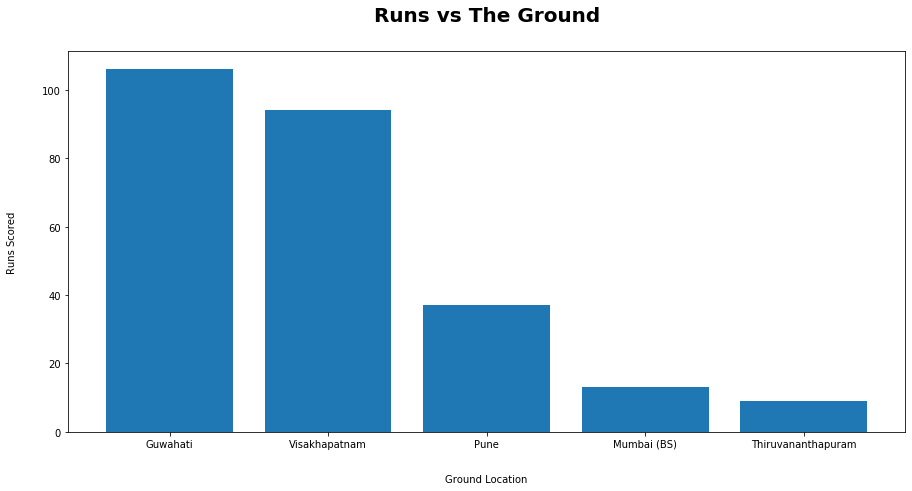

In [20]:
plt.figure(figsize=(15,7))
x = againstindia['Ground']
y = againstindia['Runs']
plt.xlabel('Ground Location', labelpad=25)
plt.ylabel('Runs Scored', labelpad=25)
plt.title('Runs vs The Ground', fontweight='bold', pad=30, fontsize=20)
plt.bar(x, y)

# Strike Rate vs Runs of Batsman

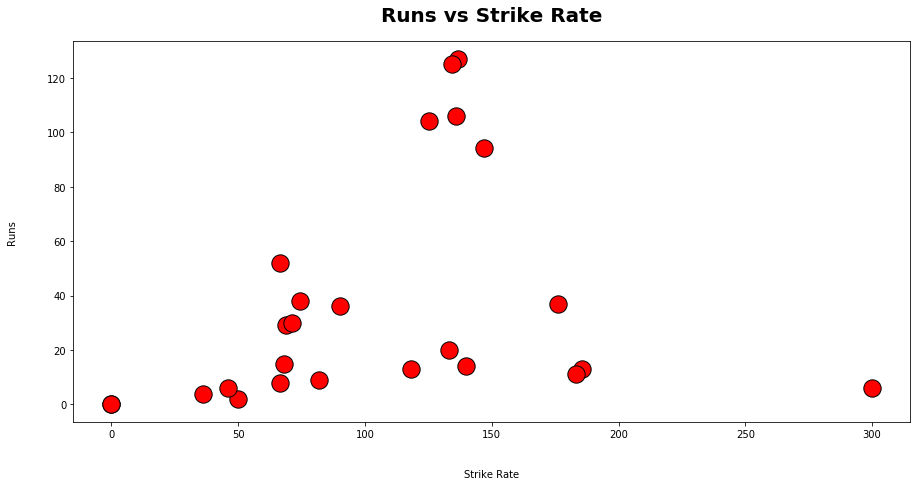

In [21]:
#strike rate vs the score of player in each match
plt.figure(figsize=(15,7))
x = df_induvidual['SR']
y = df_induvidual['Runs']
plt.xlabel('Strike Rate', labelpad=30)
plt.ylabel('Runs', labelpad=30)
plt.title('Runs vs Strike Rate', fontweight='bold', pad=20, fontsize=20)
plt.scatter(x, y, color='red', s=300, edgecolor='black')

# Grouping Matches by the opposition on whole

In [22]:
df_opposition = df.query('Opposition =="v England"')
df_opposition

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
6,7,0.,0.0,0,0.00,0.0,0.0,v England,The Oval,28 Jun 2011,ODI # 3165,Oshane Thomas,49619
9,10,1.,1.0,3,33.33,0.0,0.0,v England,Nottingham,6 Jul 2011,ODI # 3169,Oshane Thomas,49619
26,27,4.,4.0,5,80.00,0.0,0.0,v England,The Oval,22 May 2014,ODI # 3492,Oshane Thomas,49619
43,44,7,7.0,8,87.50,0.0,0.0,v England,Nottingham,21 Jun 2016,ODI # 3751,Oshane Thomas,49619
45,46,3.,3.0,4,75.00,0.0,0.0,v England,Bristol,26 Jun 2016,ODI # 3755,Oshane Thomas,49619
47,48,10,10.0,23,43.47,1.0,0.0,v England,Cardiff,2 Jul 2016,ODI # 3758,Oshane Thomas,49619
87,88,TDNB,0.0,-,0.00,0.0,0.0,v England,St George's,25 Feb 2019,ODI # 4098,Oshane Thomas,914567
88,89,0,0.0,1,0.00,0.0,0.0,v England,St George's,27 Feb 2019,ODI # 4099,Oshane Thomas,914567
91,92,49,49.0,46,106.52,2.0,3.0,v England,Chennai,17 Mar 2011,ODI # 3135,Andre Russell,276298
111,112,7,7.0,13,53.84,1.0,0.0,v England,Southampton,16 Jun 2012,ODI # 3276,Andre Russell,276298


In [23]:
#Gathering some important data from the required Batsman
print("The highest number of score against this team is: ")
print(df_opposition['Runs'].max())
print("The highest Strike Rate against this team is: ")
print(df_opposition['SR'].max())
print("The most number of 4s against this team is: ")
print(df_opposition['4s'].max())
print("The most number of 6s against this team is: ")
print(df_opposition['6s'].max())

The highest number of score against this team is: 
189.0
The highest Strike Rate against this team is: 
400.0
The most number of 4s against this team is: 
19.0
The most number of 6s against this team is: 
14.0


In [63]:
Batsman_runs = df.groupby('Batsman')['Runs'].sum()

In [64]:
Batsman_runs

Batsman
Aaron Finch             4052.0
Abid Ali                 112.0
Adam Zampa                99.0
Adil Rashid              541.0
Aftab Alam                61.0
Aiden Markram            503.0
Alex Carey               429.0
Alex Hales              2419.0
Andile Phehlukwayo       416.0
Andre Russell            998.0
Angelo Mathews          5380.0
Anrich Nortje              8.0
Asghar Afghan           2035.0
Ashley Nurse             482.0
Avishka Fernando          71.0
Babar Azam              2659.0
Ben Stokes              2196.0
Bhuvneshwar Kumar        523.0
Carlos Brathwaite        389.0
Chris Gayle            10151.0
Chris Morris             393.0
Chris Woakes            1039.0
Colin Munro             1146.0
Colin de Grandhomme      443.0
Dale Steyn               365.0
Darren Bravo            2820.0
David Miller            2922.0
David Warner            4343.0
David Willey             265.0
Dawlat Zadran            502.0
                        ...   
Ravindra Jadeja         2035.0


# Importing Bowler Data

In [4]:
bdf = pd.read_csv("F:\\INTERNSAVY INTERNSHIP\\Bowler_data.csv")

In [5]:
bdf.head()

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
0,1,8.0,0,57,0,7.12,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Suranga Lakmal,49619
1,2,10.0,0,55,2,5.50,27.50,30.0,v India,Kolkata,24 Dec 2009,ODI # 2935,Suranga Lakmal,49619
2,3,-,-,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Suranga Lakmal,49619
3,4,9.0,1,63,2,7.00,31.50,27.0,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Suranga Lakmal,49619
4,5,8.0,1,48,0,6.00,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Suranga Lakmal,49619


# Data Cleansing

In [6]:
#Dropping all the values with '-' in Overs
bdf.drop(bdf[bdf.Overs == '-'].index, inplace=True)
bdf.head()

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
0,1,8.0,0,57,0,7.12,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Suranga Lakmal,49619
1,2,10.0,0,55,2,5.50,27.50,30.0,v India,Kolkata,24 Dec 2009,ODI # 2935,Suranga Lakmal,49619
3,4,9.0,1,63,2,7.00,31.50,27.0,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Suranga Lakmal,49619
4,5,8.0,1,48,0,6.00,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Suranga Lakmal,49619
5,6,10.0,0,75,0,7.50,-,-,v India,Dhaka,10 Jan 2010,ODI # 2941,Suranga Lakmal,49619


In [7]:
df.columns

Index(['Unnamed: 0', 'Overs', 'Mdns', 'Runs', 'Wkts', 'Econ', 'Ave', 'SR',
       'Opposition', 'Ground', 'Start Date', 'Match_ID', 'Bowler',
       'Player_ID'],
      dtype='object')

In [8]:
df.shape

(11118, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11118 entries, 0 to 11117
Data columns (total 14 columns):
Unnamed: 0    11118 non-null int64
Overs         11118 non-null object
Mdns          11118 non-null object
Runs          11118 non-null object
Wkts          11118 non-null object
Econ          11118 non-null object
Ave           11118 non-null object
SR            11118 non-null object
Opposition    11118 non-null object
Ground        11118 non-null object
Start Date    11118 non-null object
Match_ID      11118 non-null object
Bowler        11118 non-null object
Player_ID     11118 non-null int64
dtypes: int64(2), object(12)
memory usage: 1.2+ MB


In [10]:
#Replacing all the '-' with 0s to make the dtypes of a column uniform
bdf['Mdns'] = bdf['Mdns'].str.replace('-', '0')
bdf['Runs'] = bdf['Runs'].str.replace('-', '0')
bdf['Wkts'] = bdf['Wkts'].str.replace('-', '0')
bdf['Econ'] = bdf['Econ'].str.replace('-', '0')
bdf['Ave'] = bdf['Ave'].str.replace('-', '0')
bdf['SR'] = bdf['SR'].str.replace('-', '0')

In [11]:
#Converting the dtypes of certain columns into float to perform operations
bdf['Overs'] = bdf['Overs'].astype(float)
bdf['Mdns'] = bdf['Mdns'].astype(float)
bdf['Runs'] = bdf['Runs'].astype(float)
bdf['Wkts'] = bdf['Wkts'].astype(float)
bdf['Econ'] = bdf['Econ'].astype(float)
bdf['Ave'] = bdf['Ave'].astype(float)
bdf['SR'] = bdf['SR'].astype(float)
bdf.dtypes

Unnamed: 0      int64
Overs         float64
Mdns          float64
Runs          float64
Wkts          float64
Econ          float64
Ave           float64
SR            float64
Opposition     object
Ground         object
Start Date     object
Match_ID       object
Bowler         object
Player_ID       int64
dtype: object

# Exploratory Data Analysis

# Highest and Lowest in the Dataset

In [12]:
#Highest Number of Wickets
bdf.loc[bdf['Wkts']==bdf['Wkts'].max()]

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
2056,2057,9.0,0.0,45.0,7.0,5.00,6.42,7.7,v West Indies,Basseterre,15 Jun 2016,ODI # 3747,Imran Tahir,40618
4933,4934,10.0,3.0,34.0,7.0,3.40,4.85,8.5,v West Indies,Christchurch,23 Dec 2017,ODI # 3944,Trent Boult,277912
5044,5045,9.0,0.0,33.0,7.0,3.66,4.71,7.7,v England,Wellington,20 Feb 2015,ODI # 3607,Tim Southee,232364
11034,11035,8.4,1.0,18.0,7.0,2.07,2.57,7.4,v West Indies,Gros Islet,9 Jun 2017,ODI # 3884,Rashid Khan,793463


In [14]:
#Highest number of Maiden overs
bdf.loc[bdf['Mdns']==bdf['Mdns'].max()]

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
67,68,10.0,4.0,13.0,4.0,1.30,3.25,15.0,v India,Dharamsala,10 Dec 2017,ODI # 3939,Suranga Lakmal,49619
193,194,10.0,4.0,28.0,3.0,2.80,9.33,20.0,v Pakistan,The Oval,7 Jun 2013,ODI # 3364,Kemar Roach,230553
200,201,6.0,4.0,14.0,1.0,2.33,14.00,36.0,v Pakistan,Providence,16 Jul 2013,ODI # 3390,Kemar Roach,230553
867,868,10.0,4.0,13.0,4.0,1.30,3.25,15.0,v Pakistan,Providence,14 Jul 2013,ODI # 3389,Jason Holder,391485
982,983,10.0,4.0,37.0,2.0,3.70,18.50,30.0,v India,Dharamsala,10 Dec 2017,ODI # 3939,Nuwan Pradeep,324358
2231,2232,8.0,4.0,19.0,0.0,2.37,0.00,0.0,v Bangladesh,Dhaka,14 Mar 2008,ODI # 2692,Dale Steyn,47492
4952,4953,10.0,4.0,21.0,5.0,2.10,4.20,12.0,v India,Hamilton,31 Jan 2019,ODI # 4091,Trent Boult,277912
5320,5321,9.0,4.0,23.0,1.0,2.55,23.00,54.0,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,Mohammed Shami,481896
5644,5645,8.0,4.0,24.0,2.0,3.00,12.00,24.0,v Sri Lanka,Port of Spain,11 Jul 2013,ODI # 3388,Bhuvneshwar Kumar,326016
9052,9053,10.0,4.0,13.0,1.0,1.30,13.00,60.0,v Scotland,Chattogram,15 Dec 2006,ODI # 2465,Shakib Al Hasan,56143


In [15]:
#Lowest Economy by a bowler who has balled more than 5 overs
eight_overs = bdf.loc[bdf['Overs']>5]
eight_overs.loc[eight_overs['Econ']==eight_overs['Econ'].min()]

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
2350,2351,5.2,1.0,5.0,3.0,0.93,1.66,10.6,v New Zealand,Wellington,25 Feb 2017,ODI # 3841,Dwaine Pretorius,327830


In [16]:
#Lowest Economy by a bowler who has balled more than 8 overs
eight_overs = bdf.loc[bdf['Overs']>=8]
eight_overs.loc[eight_overs['Econ']==eight_overs['Econ'].min()]

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
9099,9100,10.0,4.0,11.0,3.0,1.1,3.66,20.0,v Zimbabwe,Dhaka,19 Jan 2009,ODI # 2797,Shakib Al Hasan,56143


In [17]:
#Gathering Data of one opponent induvidually
bdf_opponent = bdf.query('Opposition =="v India"')
bdf_opponent

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
0,1,8.0,0.0,57.0,0.0,7.12,0.00,0.0,v India,Nagpur,18 Dec 2009,ODI # 2933,Suranga Lakmal,49619
1,2,10.0,0.0,55.0,2.0,5.50,27.50,30.0,v India,Kolkata,24 Dec 2009,ODI # 2935,Suranga Lakmal,49619
4,5,8.0,1.0,48.0,0.0,6.00,0.00,0.0,v India,Dhaka,5 Jan 2010,ODI # 2938,Suranga Lakmal,49619
5,6,10.0,0.0,75.0,0.0,7.50,0.00,0.0,v India,Dhaka,10 Jan 2010,ODI # 2941,Suranga Lakmal,49619
12,13,10.0,1.0,67.0,1.0,6.70,67.00,60.0,v India,Dhaka,13 Mar 2012,ODI # 3259,Suranga Lakmal,49619
15,16,10.0,1.0,33.0,1.0,3.30,33.00,60.0,v India,Port of Spain,11 Jul 2013,ODI # 3388,Suranga Lakmal,49619
62,63,10.0,1.0,72.0,1.0,7.20,72.00,60.0,v India,The Oval,8 Jun 2017,ODI # 3882,Suranga Lakmal,49619
67,68,10.0,4.0,13.0,4.0,1.30,3.25,15.0,v India,Dharamsala,10 Dec 2017,ODI # 3939,Suranga Lakmal,49619
68,69,8.0,0.0,71.0,0.0,8.87,0.00,0.0,v India,Mohali,13 Dec 2017,ODI # 3941,Suranga Lakmal,49619
69,70,5.0,2.0,20.0,0.0,4.00,0.00,0.0,v India,Visakhapatnam,17 Dec 2017,ODI # 3942,Suranga Lakmal,49619


In [18]:
print("The maximum runs conceeded against this team is: ")
print(bdf.loc[bdf['Runs'].max()])
print("-------------------------------------------------")
print("The maximum maidens conceeded against this team is: ")
print(bdf.loc[bdf['Mdns'].max()])
print("-------------------------------------------------")
print("The maximum Wickets taken against this team is: ")
print(bdf.loc[bdf['Wkts'].max()])
print("-------------------------------------------------")
print("The maximum Economy maintained against this team is: ")
print(bdf.loc[bdf['Econ'].max()])

The maximum runs conceeded against this team is: 
Unnamed: 0              107
Overs                     4
Mdns                      0
Runs                     21
Wkts                      0
Econ                   5.25
Ave                       0
SR                        0
Opposition      v Australia
Ground            Kingstown
Start Date      16 Mar 2012
Match_ID         ODI # 3262
Bowler        Andre Russell
Player_ID            276298
Name: 106, dtype: object
-------------------------------------------------
The maximum maidens conceeded against this team is: 
Unnamed: 0                 5
Overs                      8
Mdns                       1
Runs                      48
Wkts                       0
Econ                       6
Ave                        0
SR                         0
Opposition           v India
Ground                 Dhaka
Start Date        5 Jan 2010
Match_ID          ODI # 2938
Bowler        Suranga Lakmal
Player_ID              49619
Name: 4, dtype: object
-

# Induvidual Performance

In [19]:
#Top 100 ballers with highest macthes/data
new = bdf['Bowler'].value_counts()[:20]
new

Shoaib Malik         213
Lasith Malinga       212
Mashrafe Mortaza     209
Chris Gayle          195
Shakib Al Hasan      195
Mohammad Hafeez      169
Angelo Mathews       154
Ravindra Jadeja      147
Thisara Perera       144
Tim Southee          137
Mahmudullah          132
JP Duminy            131
Dale Steyn           124
Mohammad Nabi        107
Bhuvneshwar Kumar    104
Imran Tahir           96
Rubel Hossain         95
Jason Holder          93
Moeen Ali             89
Kemar Roach           84
Name: Bowler, dtype: int64

In [20]:
#Gathering Data of reqd Bowler induvidually
bdf_induvidual = bdf.query('Bowler =="Ravindra Jadeja"')
bdf_induvidual

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
5383,5384,6.0,0.0,40.0,0.0,6.66,0.00,0.0,v Sri Lanka,Colombo (RPS),8 Feb 2009,ODI # 2818,Ravindra Jadeja,234675
5384,5385,7.0,1.0,34.0,0.0,4.85,0.00,0.0,v West Indies,Kingston,26 Jun 2009,ODI # 2852,Ravindra Jadeja,234675
5385,5386,2.0,0.0,12.0,0.0,6.00,0.00,0.0,v West Indies,Kingston,28 Jun 2009,ODI # 2853,Ravindra Jadeja,234675
5386,5387,9.0,0.0,39.0,1.0,4.33,39.00,54.0,v Australia,Vadodara,25 Oct 2009,ODI # 2913,Ravindra Jadeja,234675
5387,5388,6.3,0.0,35.0,3.0,5.38,11.66,13.0,v Australia,Nagpur,28 Oct 2009,ODI # 2915,Ravindra Jadeja,234675
5388,5389,9.0,1.0,41.0,2.0,4.55,20.50,27.0,v Australia,Delhi,31 Oct 2009,ODI # 2918,Ravindra Jadeja,234675
5389,5390,7.0,0.0,27.0,0.0,3.85,0.00,0.0,v Australia,Mohali,2 Nov 2009,ODI # 2919,Ravindra Jadeja,234675
5390,5391,5.0,0.0,44.0,0.0,8.80,0.00,0.0,v Australia,Hyderabad (Deccan),5 Nov 2009,ODI # 2923,Ravindra Jadeja,234675
5391,5392,10.0,1.0,36.0,0.0,3.60,0.00,0.0,v Australia,Guwahati,8 Nov 2009,ODI # 2925,Ravindra Jadeja,234675
5392,5393,8.0,0.0,73.0,0.0,9.12,0.00,0.0,v Sri Lanka,Rajkot,15 Dec 2009,ODI # 2932,Ravindra Jadeja,234675


In [21]:
#Storing the data into variables
x = bdf_induvidual['Overs']
y1 = bdf_induvidual['Mdns']
y2 = bdf_induvidual['Runs']
y3 = bdf_induvidual['Wkts']
y4 = bdf_induvidual['Econ']
y5 = bdf_induvidual['Ave']
y6 = bdf_induvidual['SR']

Text(0.5, 1.0, 'Overs vs Strike Rate of bowlers')

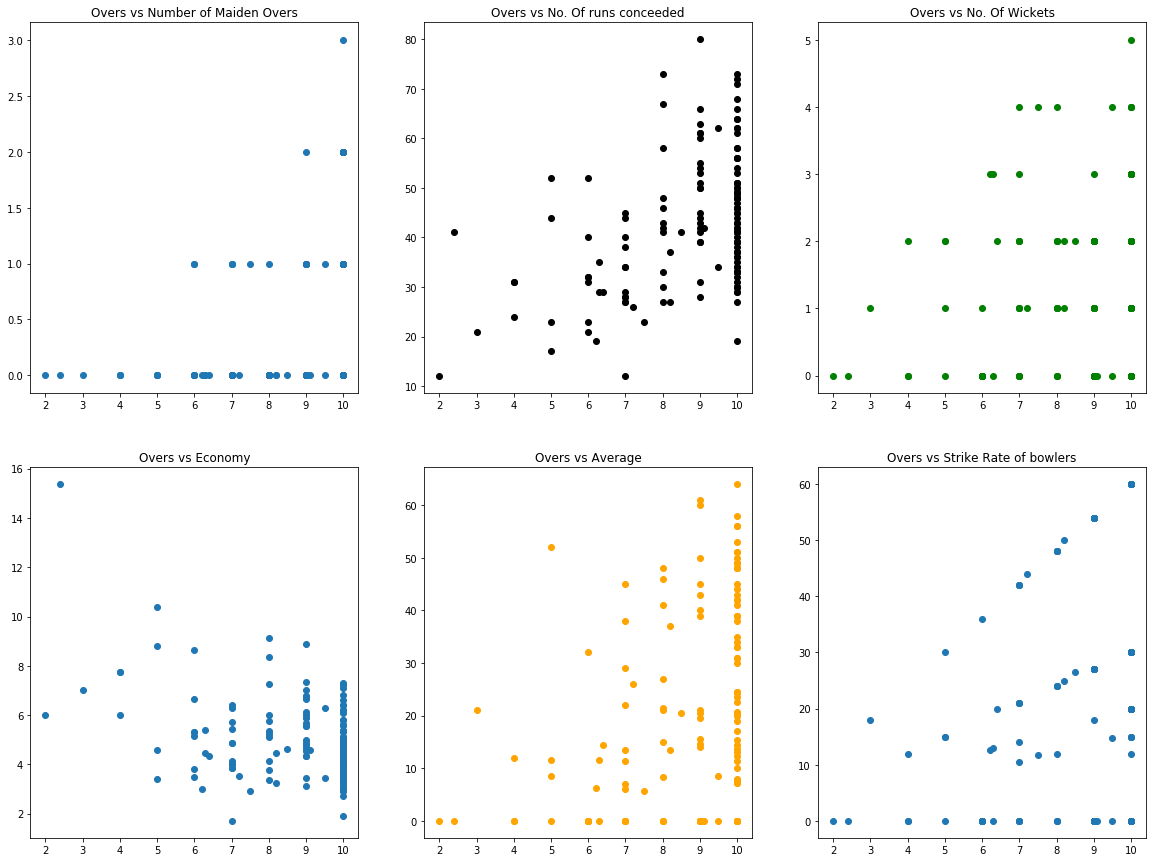

In [22]:
#Plotting the varuous graphs with Overs as X axis to understand the complete performance of a bowler
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(20, 15))
ax1.scatter(x, y1)
ax1.set_title('Overs vs Number of Maiden Overs')
ax2.scatter(x, y2, color='black')
ax2.set_title('Overs vs No. Of runs conceeded')
ax3.scatter(x, y3, color='green')
ax3.set_title('Overs vs No. Of Wickets')
ax4.scatter(x, y4)
ax4.set_title('Overs vs Economy')
ax5.scatter(x, y5, color='orange')
ax5.set_title('Overs vs Average')
ax6.scatter(x, y6)
ax6.set_title('Overs vs Strike Rate of bowlers')

In [23]:
#Gathering Data of one opponent induvidually
bdf_induvidual_opponence = bdf_induvidual.query('Opposition =="v Pakistan"')
bdf_induvidual_opponence

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
5410,5411,10.0,0.0,43.0,1.0,4.30,43.00,60.0,v Pakistan,Dambulla,19 Jun 2010,ODI # 2996,Ravindra Jadeja,234675
5441,5442,10.0,1.0,41.0,3.0,4.10,13.66,20.0,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,Ravindra Jadeja,234675
5442,5443,10.0,2.0,19.0,1.0,1.90,19.00,60.0,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,Ravindra Jadeja,234675
5450,5451,8.0,1.0,30.0,2.0,3.75,15.00,24.0,v Pakistan,Birmingham,15 Jun 2013,ODI # 3372,Ravindra Jadeja,234675
5482,5483,10.0,1.0,61.0,0.0,6.10,0.00,0.0,v Pakistan,Dhaka,2 Mar 2014,ODI # 3479,Ravindra Jadeja,234675
5494,5495,10.0,0.0,56.0,1.0,5.60,56.00,60.0,v Pakistan,Adelaide,15 Feb 2015,ODI # 3602,Ravindra Jadeja,234675
5512,5513,8.0,0.0,43.0,2.0,5.37,21.50,24.0,v Pakistan,Birmingham,4 Jun 2017,ODI # 3878,Ravindra Jadeja,234675
5516,5517,8.0,0.0,67.0,0.0,8.37,0.00,0.0,v Pakistan,The Oval,18 Jun 2017,ODI # 3894,Ravindra Jadeja,234675
5520,5521,9.0,0.0,50.0,0.0,5.55,0.00,0.0,v Pakistan,Dubai (DSC),23 Sep 2018,ODI # 4044,Ravindra Jadeja,234675


In [29]:
bdf['Bowler'].unique()

array(['Suranga Lakmal', 'Oshane Thomas', 'Andre Russell', 'Kemar Roach',
       'Ashley Nurse', 'Shannon Gabriel', 'Fabian Allen',
       'Sheldon Cottrell', 'Carlos Brathwaite', 'Chris Gayle ',
       'Jason Holder ', 'Nuwan Pradeep', 'Lasith Malinga',
       'Milinda Siriwardana', 'Jeevan Mendis', 'Jeffrey Vandersay',
       'Isuru Udana', 'Thisara Perera', 'Kusal Mendis',
       'Lahiru Thirimanne', 'Angelo Mathews', 'Dhananjaya de Silva ',
       'Dimuth Karunaratne ', 'Tabraiz Shamsi', 'Imran Tahir',
       'Chris Morris', 'Anrich Nortje', 'Lungi Ngidi', 'Kagiso Rabada',
       'Dale Steyn', 'Dwaine Pretorius', 'Andile Phehlukwayo',
       'JP Duminy', 'Aiden Markram', 'Faf du Plessis ', 'Haris Sohail',
       'Mohammad Hasnain', 'Junaid Khan', 'Shaheen Afridi',
       'Faheem Ashraf', 'Hasan Ali', 'Imad Wasim', 'Shadab Khan',
       'Mohammad Hafeez', 'Fakhar Zaman', 'Shoaib Malik',
       'Sarfaraz Ahmed ', 'Ross Taylor', 'Ish Sodhi', 'Mitchell Santner',
       'James Neesham',

In [30]:
# counting unique values
n = len(pd.unique(df['Bowler']))
  
print("No.of.unique values :", 
      n)

No.of.unique values : 150


The data consists of total 150 Bowlers

In [31]:
bdf['Opposition'].unique()

array(['v India', 'v Bangladesh', 'v England', 'v Australia',
       'v Pakistan', 'v South Africa', 'v Afghanistan', 'v Ireland',
       'v New Zealand', 'v West Indies', 'v Zimbabwe', 'v U.A.E.',
       'v Sri Lanka', 'v Bermuda', 'v Canada', 'v Netherlands',
       'v Scotland', 'v P.N.G.', 'v Kenya', 'v Asia XI', 'v Hong Kong',
       'v Africa XI'], dtype=object)

In [32]:
# counting unique values
n = len(pd.unique(df['Opposition']))
  
print("No.of.unique values :", 
      n)

No.of.unique values : 22


Total Number of Countries in this data is 22

In [33]:
bdf['Ground'].unique()

array(['Nagpur', 'Kolkata', 'Dhaka', 'The Oval', 'Leeds', "Lord's",
       'Nottingham', 'Pallekele', 'Dubai (DSC)', 'Port of Spain',
       'Colombo (RPS)', 'Sharjah', 'Abu Dhabi', 'Fatullah', 'Dublin',
       'Dunedin', 'Christchurch', 'Melbourne', 'Wellington', 'Dambulla',
       'Hambantota', 'Dublin (Malahide)', 'Birmingham', 'Bristol',
       'Cardiff', 'Harare', 'Bulawayo', 'Port Elizabeth', 'Durban',
       'Johannesburg', 'Centurion', 'Colombo (SSC)', 'Dharamsala',
       'Mohali', 'Visakhapatnam', 'Guwahati', 'Thiruvananthapuram',
       'Bridgetown', "St George's", 'Gros Islet', 'Chennai',
       'North Sound', 'Kingston', 'Cuttack', 'Ahmedabad', 'Indore',
       'Kingstown', 'Southampton', 'Basseterre', 'Khulna', 'Canberra',
       'Sydney', 'Hamilton', 'Kochi', 'Delhi', 'East London', 'Nelson',
       'Perth', 'Napier', 'Providence', 'King City (NW)', 'Roseau',
       'Adelaide', 'Chattogram', 'Pune', 'Mumbai (BS)', 'Sylhet',
       'Manchester', 'Whangarei', 'Toronto', 'C

In [35]:
# counting unique values
n = len(pd.unique(df['Ground']))
  
print("No.of.unique values :", 
      n)

No.of.unique values : 134


Total 134 Grounds are used to play these matches.